In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv("datasets/created/new_model.csv")


In [7]:
possible_features = ["rank_home", "rank_away"] + df.columns[8:25].tolist() + df.columns[37:-2].tolist()


In [8]:
df['total_games_home'] = df.apply(lambda x: len(df[(df.home_team == x["home_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["home_team"]) & (df.date < x["date"])]), axis=1)


In [9]:
df['total_games_away'] = df.apply(lambda x: len(df[(df.home_team == x["away_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["away_team"]) & (df.date < x["date"])]), axis=1)


In [10]:
df_model = df[(df.total_games_home > 5) & (df.total_games_away > 5)]


In [11]:
df_model[["home_team", "away_team", "home_score", "away_score", "home_goals_mean", "home_goals_mean_l5"]]


,home_team,away_team,home_score,away_score,home_goals_mean,home_goals_mean_l5
33,Colombia,Venezuela,0,0,1.714286,1.4
35,Chile,Bolivia,1,0,1.375000,1.2
37,Venezuela,Ecuador,2,2,0.375000,0.6
38,Colombia,Peru,1,2,1.500000,1.4
39,Uruguay,Chile,1,1,1.000000,0.6
...,...,...,...,...,...,...
214,Argentina,Ecuador,1,0,1.676471,1.4
215,Chile,Paraguay,3,0,0.969697,0.4
216,Ecuador,Bolivia,3,1,1.314286,0.6
217,Colombia,Bolivia,3,0,1.205882,1.6


# Home Team

In [12]:
target = 'home_score'
df_feats = df_model[[target] + possible_features]

In [13]:
possible_features[10:20]


['home_rank_mean_l5',
 'home_points_mean',
 'home_points_mean_l5',
 'away_goals_mean',
 'away_goals_mean_l5',
 'away_goals_suf_mean',
 'away_goals_suf_mean_l5',
 'away_rank_mean',
 'away_rank_mean_l5',
 'total_games_away']

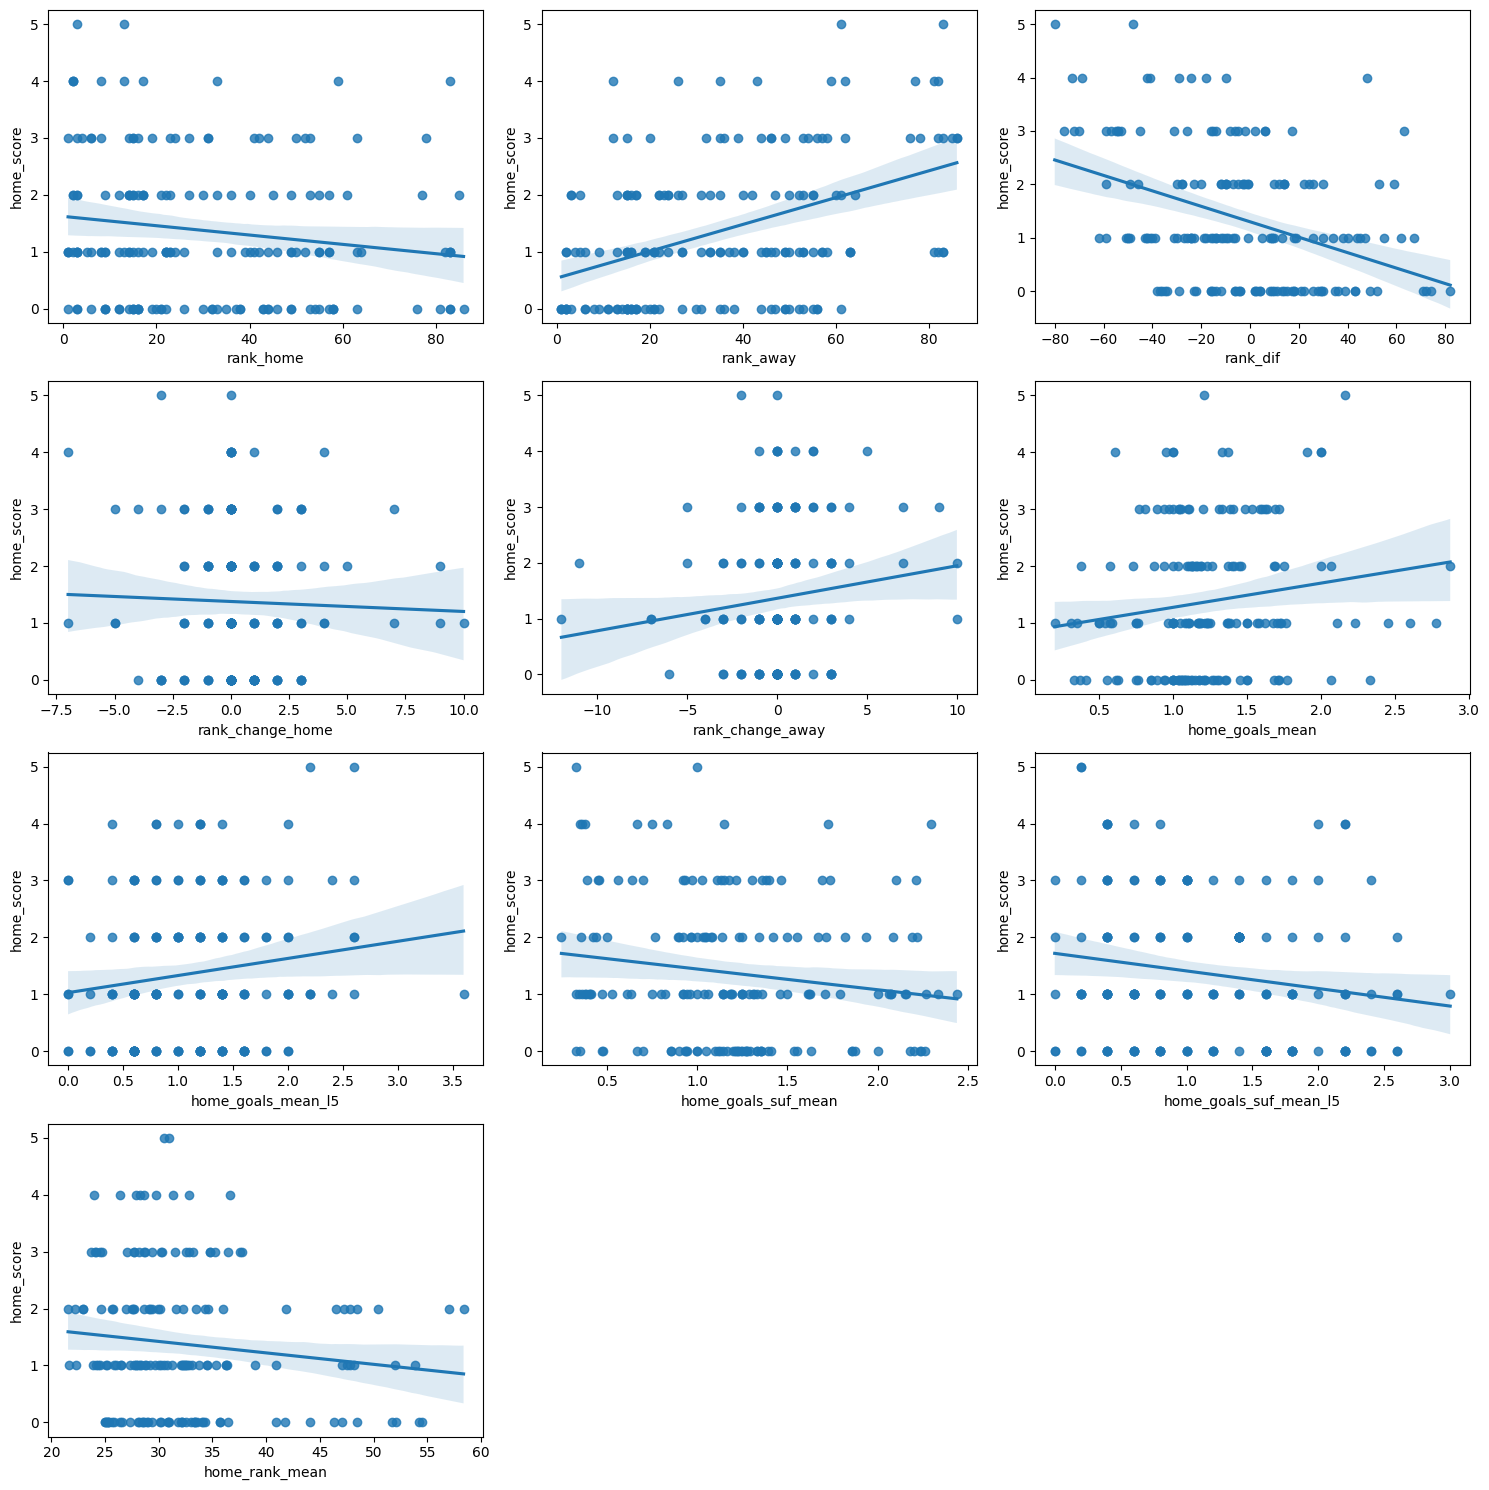

In [22]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[:10])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[:10]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

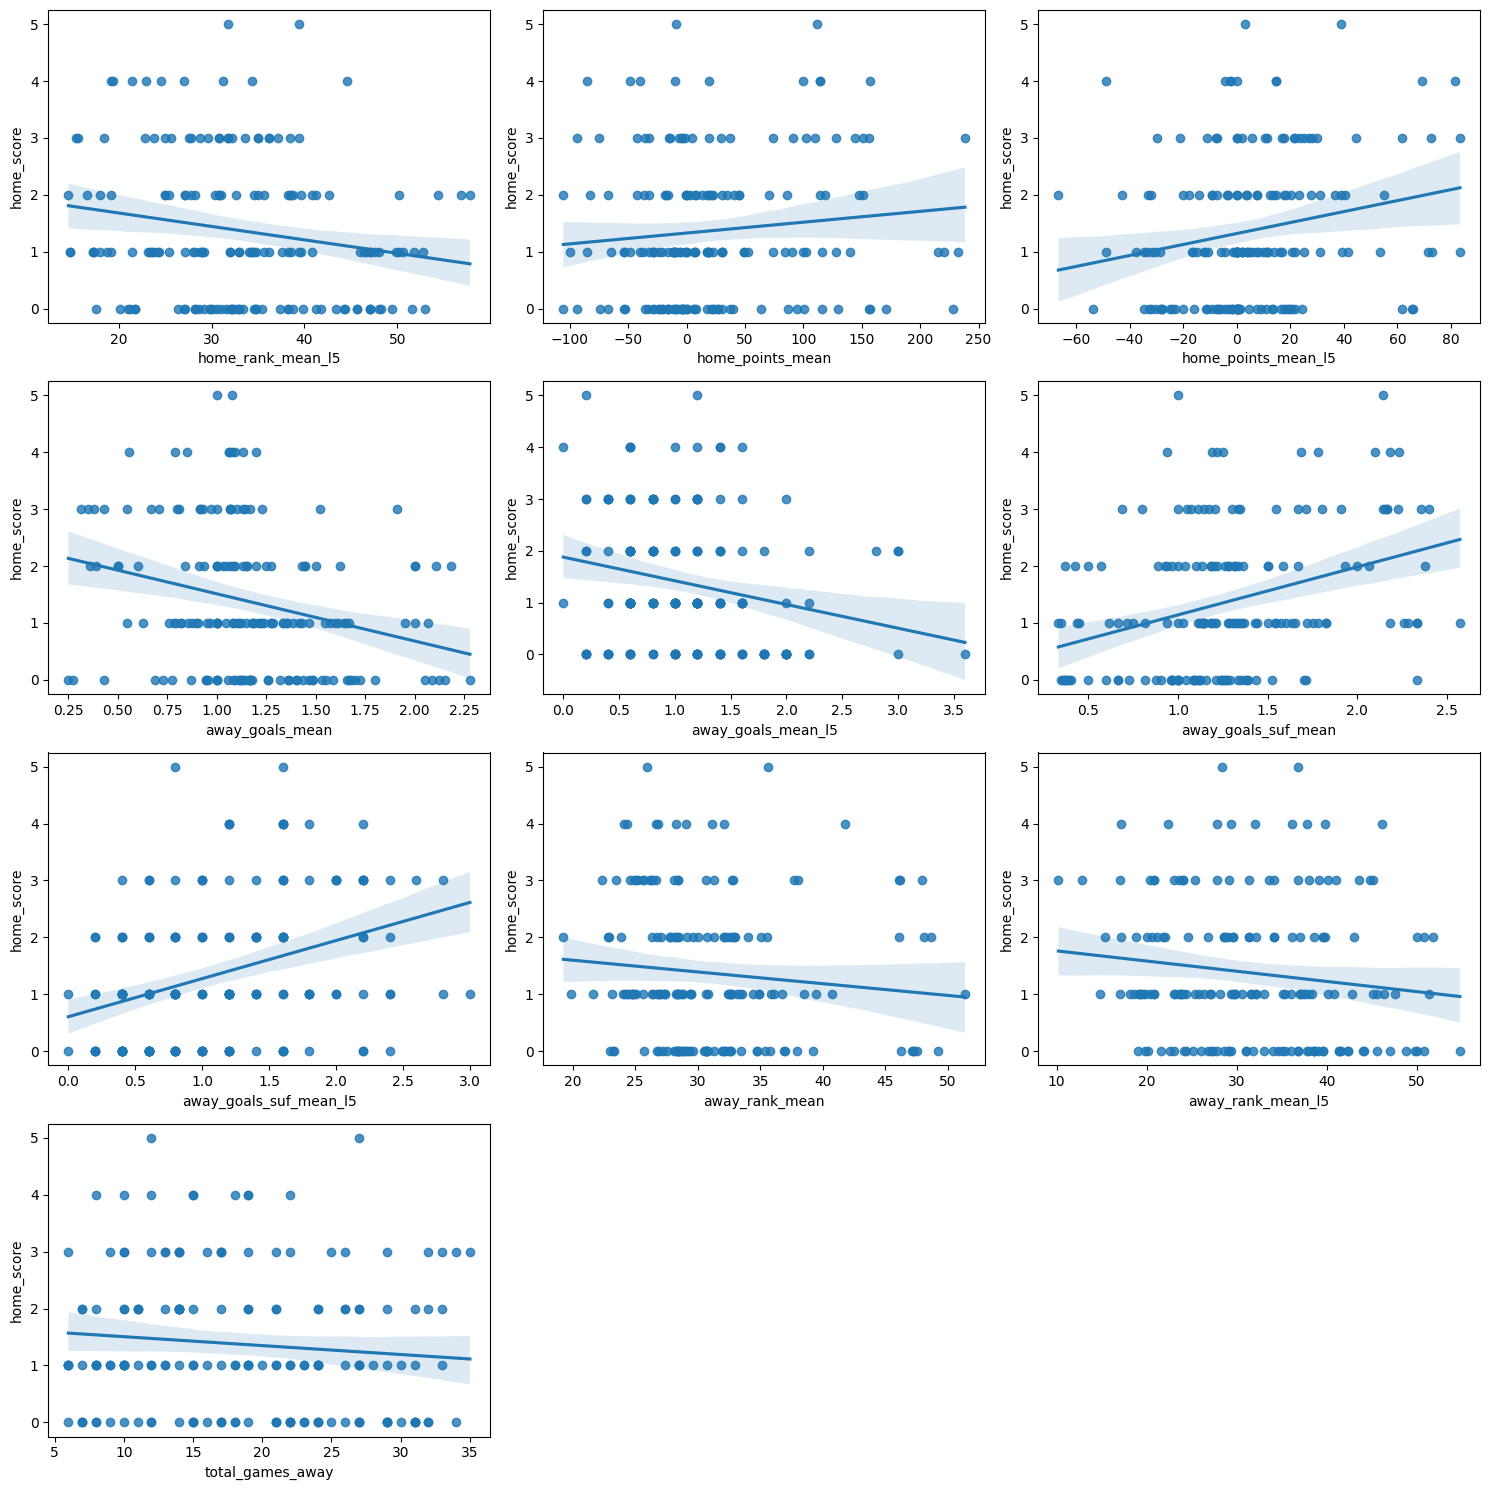

In [23]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[10:20])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[10:20]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

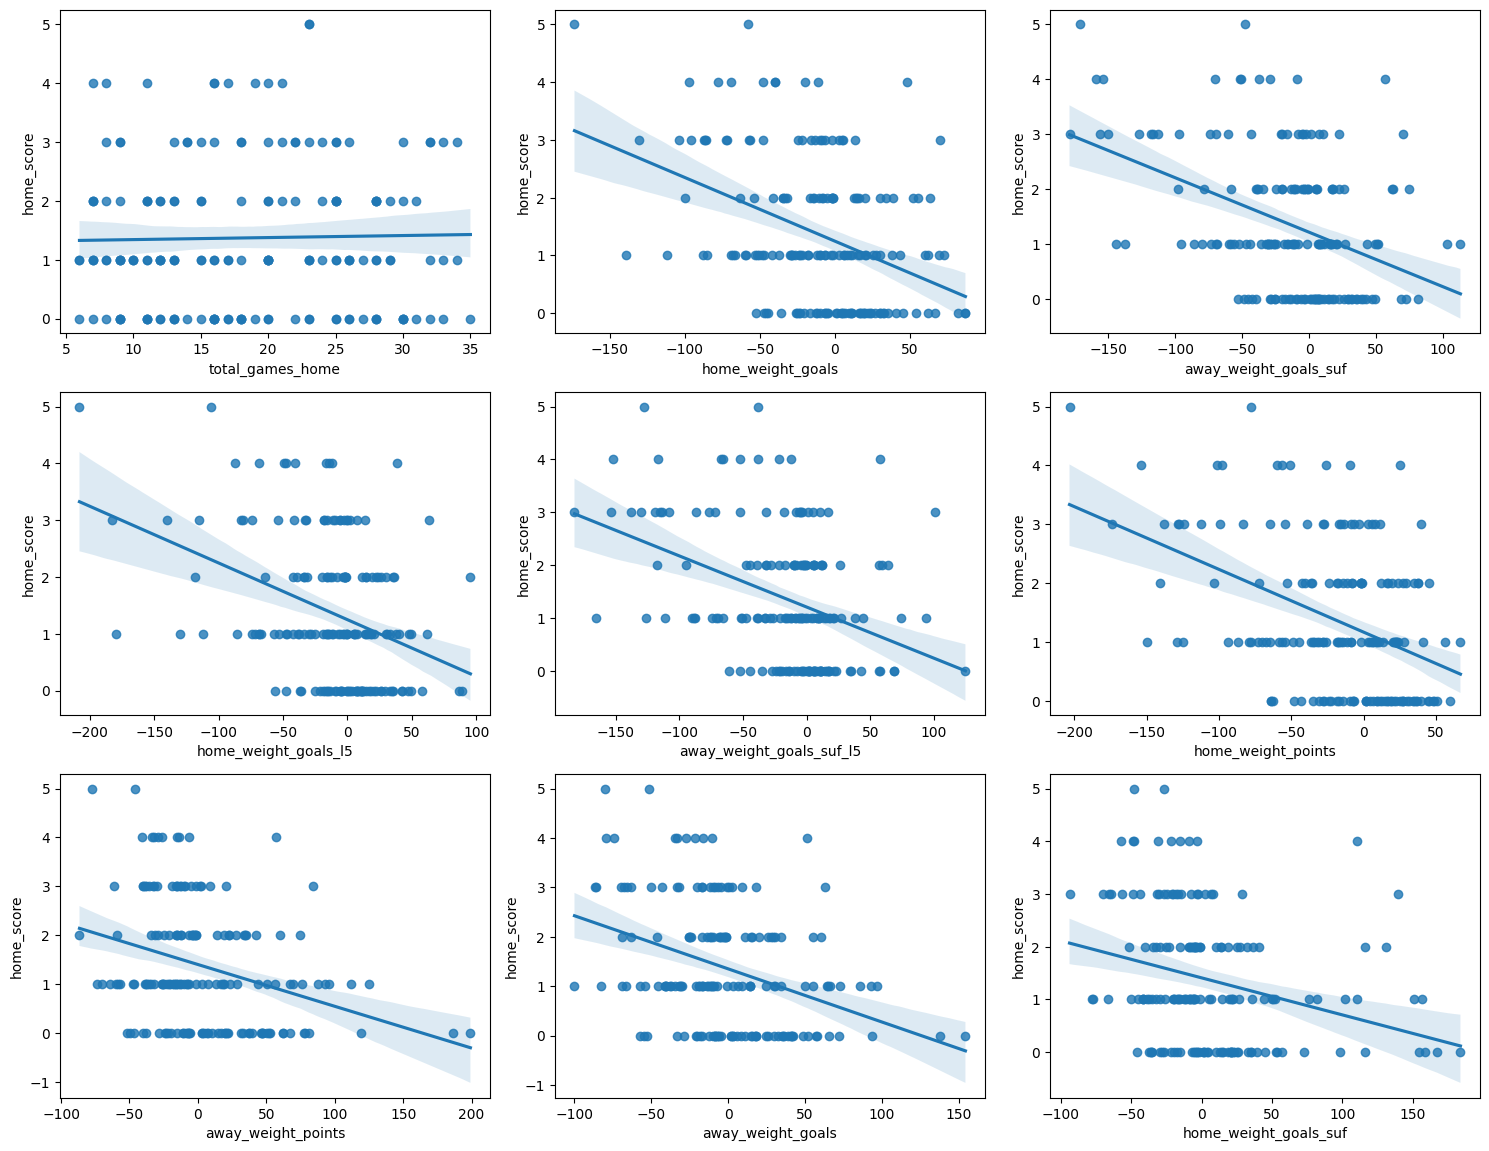

In [24]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[20:])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[20:]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

                     feature     slope  abs_slope
15       away_goals_suf_mean  0.844073   0.844073
13           away_goals_mean -0.830231   0.830231
16    away_goals_suf_mean_l5  0.669731   0.669731
14        away_goals_mean_l5 -0.457539   0.457539
5            home_goals_mean  0.425535   0.425535
7        home_goals_suf_mean -0.364917   0.364917
8     home_goals_suf_mean_l5 -0.309162   0.309162
6         home_goals_mean_l5  0.300818   0.300818
4           rank_change_away  0.058223   0.058223
10         home_rank_mean_l5 -0.023639   0.023639
1                  rank_away  0.023585   0.023585
17            away_rank_mean -0.020635   0.020635
9             home_rank_mean -0.020115   0.020115
18         away_rank_mean_l5 -0.017912   0.017912
3           rank_change_home -0.017564   0.017564
19          total_games_away -0.015686   0.015686
2                   rank_dif -0.014478   0.014478
21         home_weight_goals -0.011030   0.011030
27         away_weight_goals -0.010752   0.010752


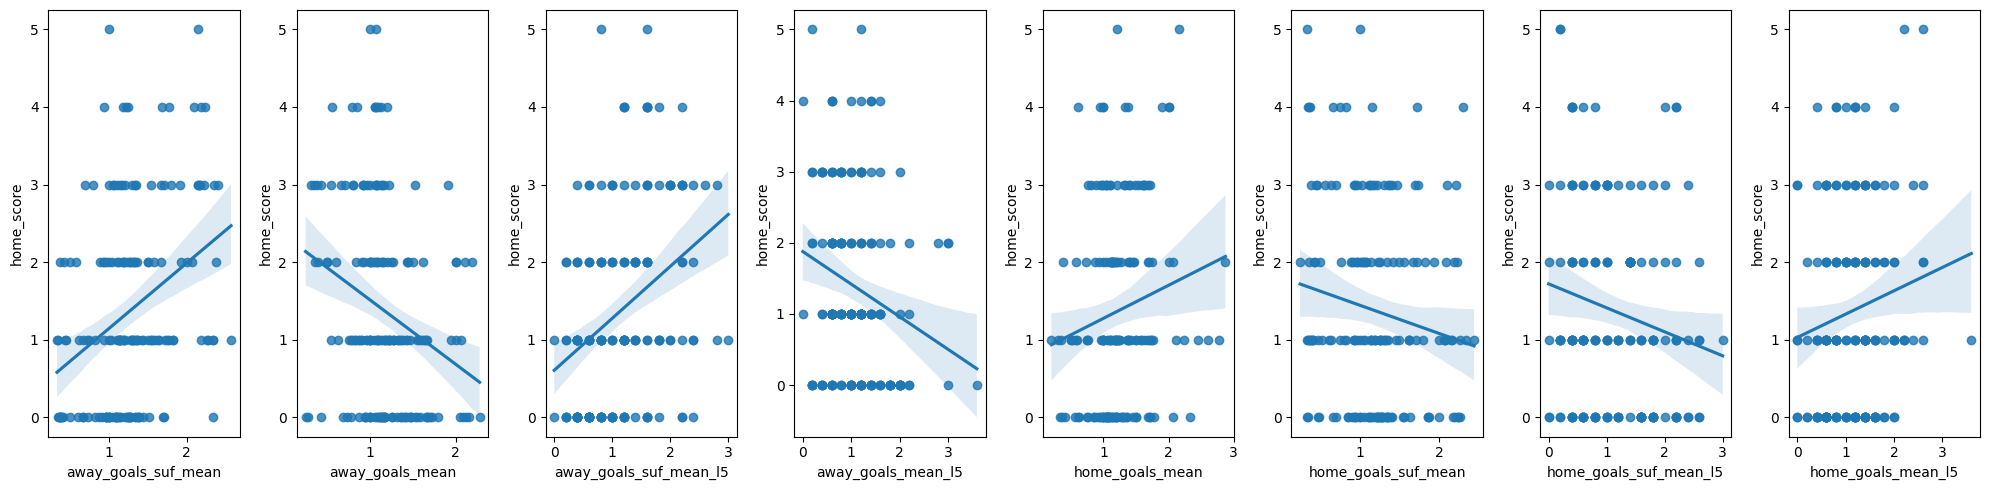

In [38]:
from sklearn.linear_model import LinearRegression


slopes = []

for feature in possible_features:
    X = df_feats[[feature]].values.reshape(-1, 1)
    y = df_feats[target].values
    reg = LinearRegression().fit(X, y)
    slopes.append(reg.coef_[0])

slopes_df = pd.DataFrame({'feature': possible_features, 'slope': slopes})

slopes_df['abs_slope'] = slopes_df['slope'].abs()
slopes_df = slopes_df.sort_values(by='abs_slope', ascending=False)

selected_features = slopes_df['feature'].values[:8]  # Aquí seleccionamos las top 3 características

print(slopes_df)
print("Selected features:", selected_features)

fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(20, 5))
for i, feature in enumerate(selected_features):
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[i])

plt.tight_layout()
plt.show()

In [41]:
selected_features = [['away_goals_suf_mean'], ['away_goals_mean'], ['away_goals_suf_mean_l5'], 
 ['away_goals_mean_l5'], ['home_goals_mean'], ['home_goals_suf_mean'], ['home_goals_mean_l5'], ['home_goals_suf_mean_l5']]

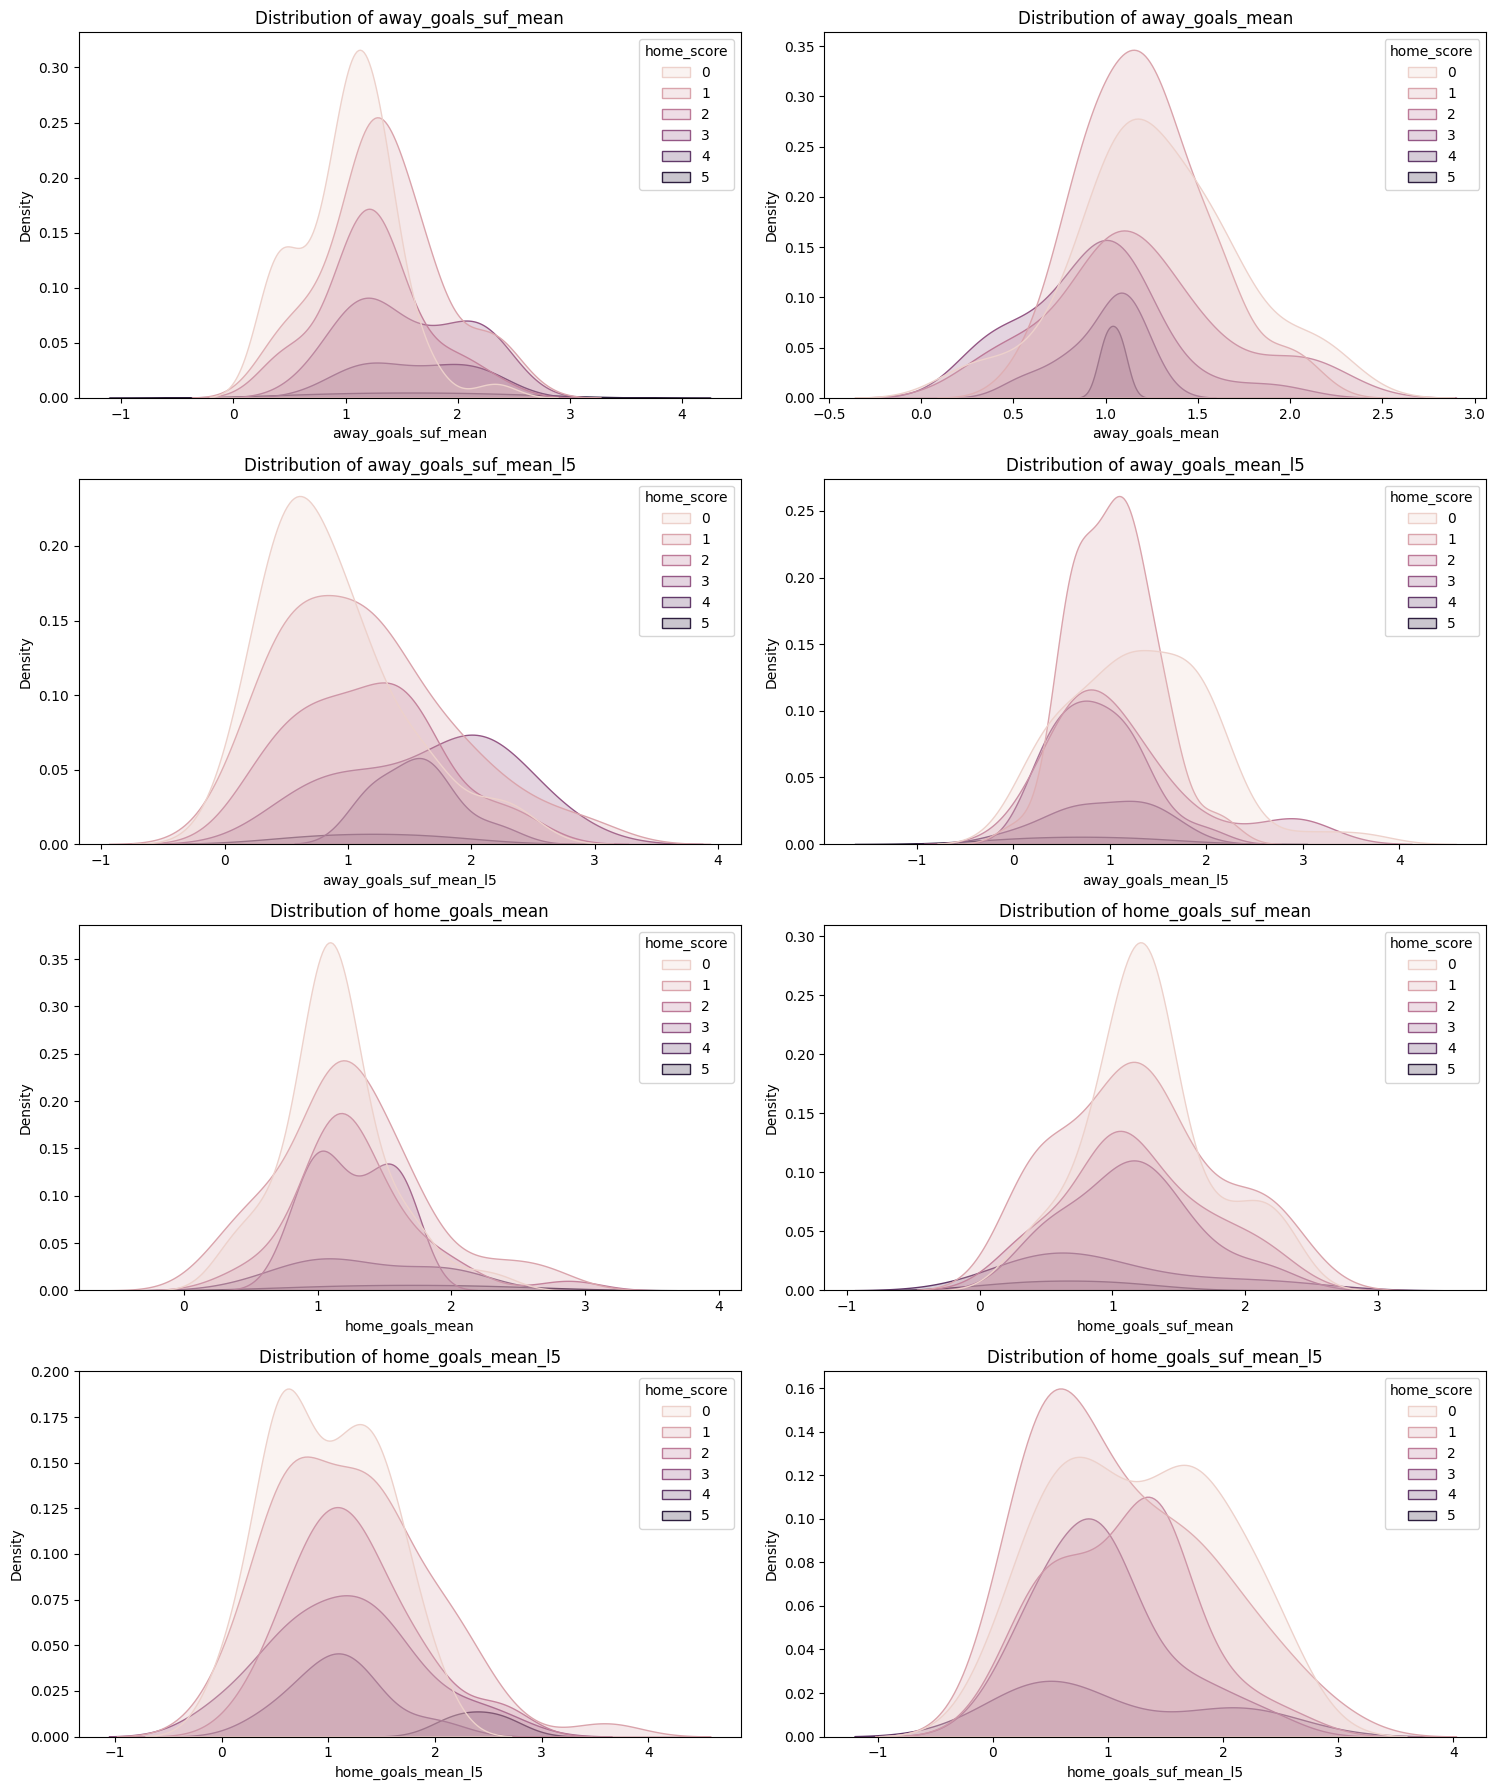

In [42]:
# Número de filas y columnas
num_cols = 2
num_rows = (len(selected_features) + num_cols - 1) // num_cols

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 18))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear gráficos de densidad para cada característica
for i, feature in enumerate(selected_features):
    sns.kdeplot(data=df_feats, x=feature[0], hue=target, fill=True, warn_singular=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature[0]}')

# Ocultar cualquier subplot vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [43]:

home_columns = ['away_goals_suf_mean', 'away_goals_mean', 'away_goals_suf_mean_l5', 'away_goals_mean_l5', 'home_goals_mean', 'home_goals_suf_mean', 'home_goals_mean_l5', 'home_goals_suf_mean_l5']
import os

folder_name = "created"
datasets_folder = "./datasets"

new_folder_path = os.path.join(datasets_folder, folder_name)
os.makedirs(new_folder_path, exist_ok=True)

df_model[["home_score"]+home_columns].to_csv('./datasets/created/home_db.csv',index=False)



# Away Team

In [44]:
target = 'away_score'

In [45]:
df_feats = df_model[[target] + possible_features]

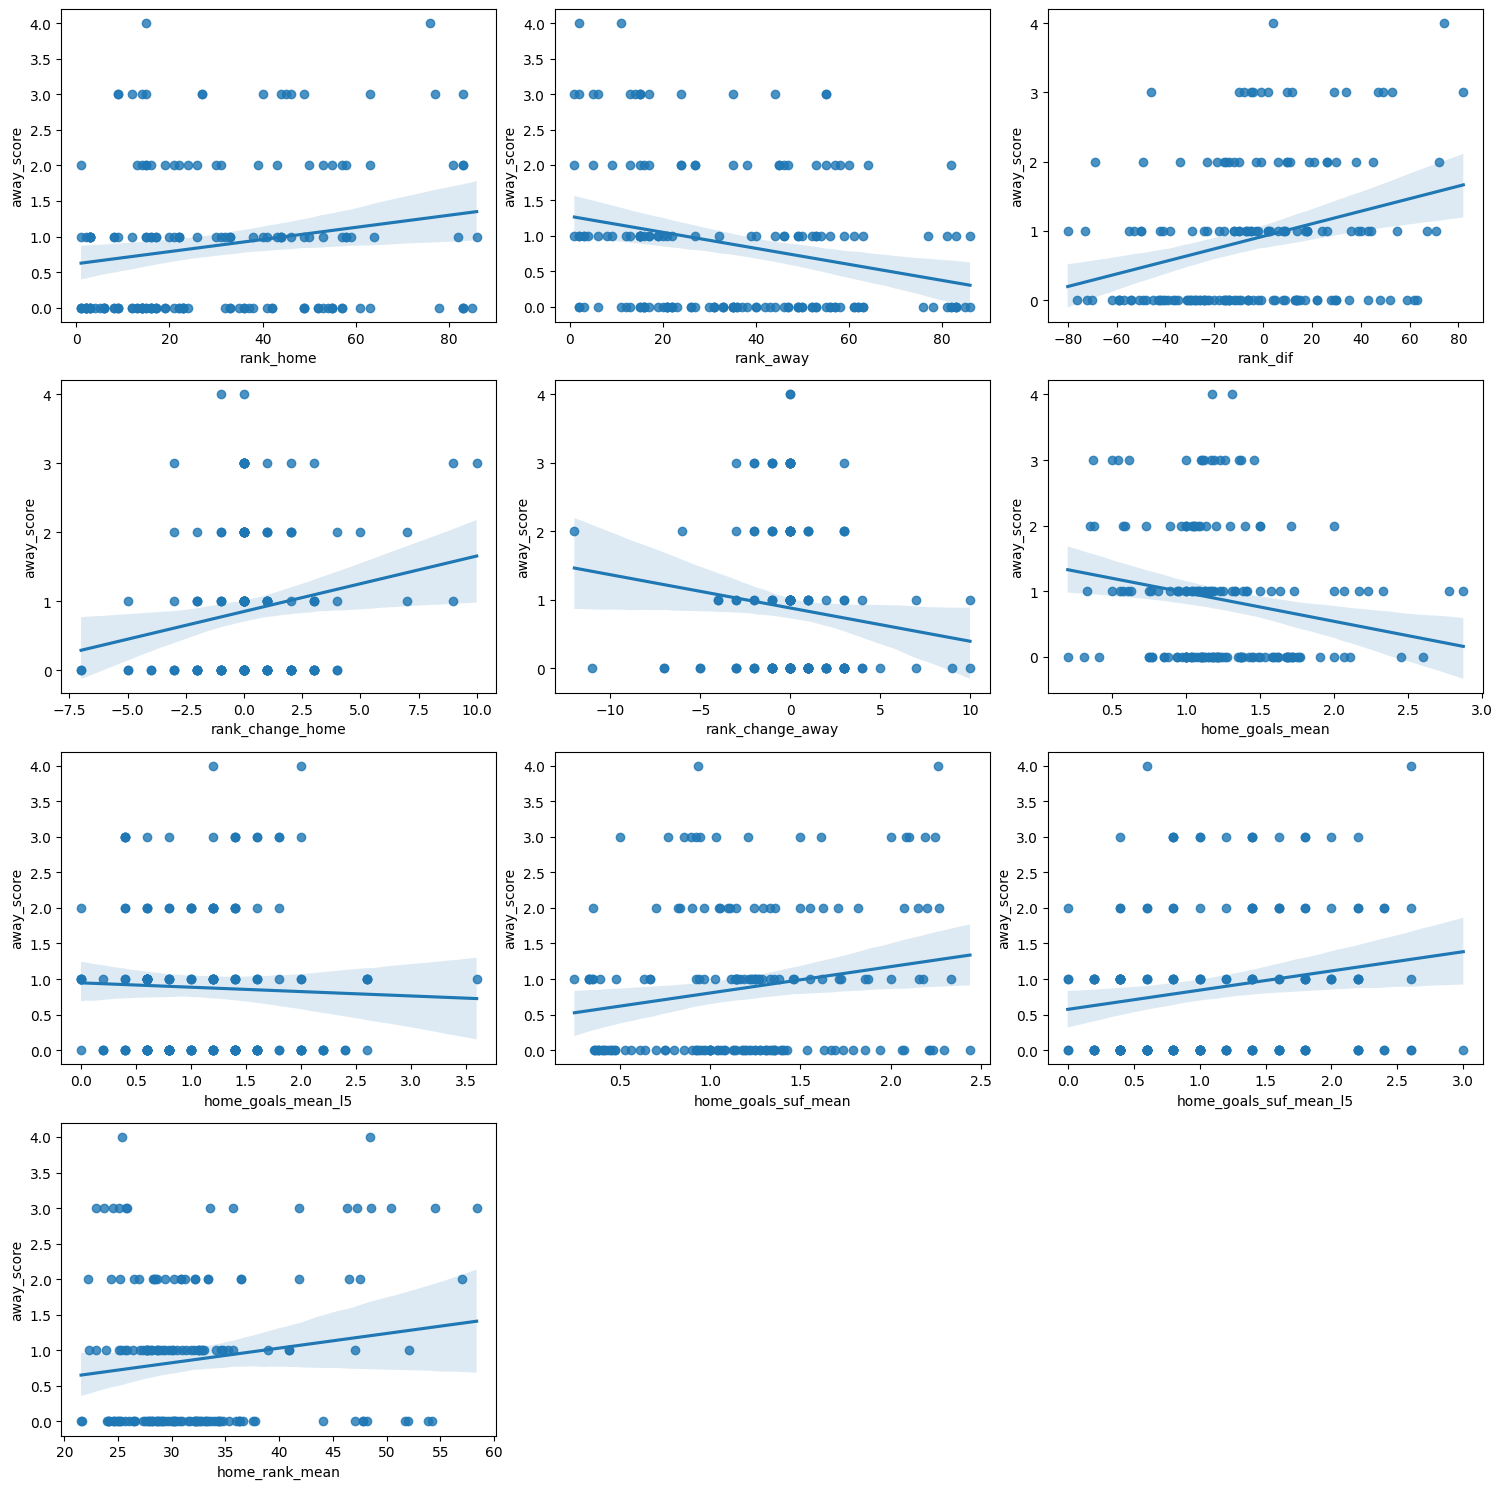

In [46]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[:10])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[:10]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

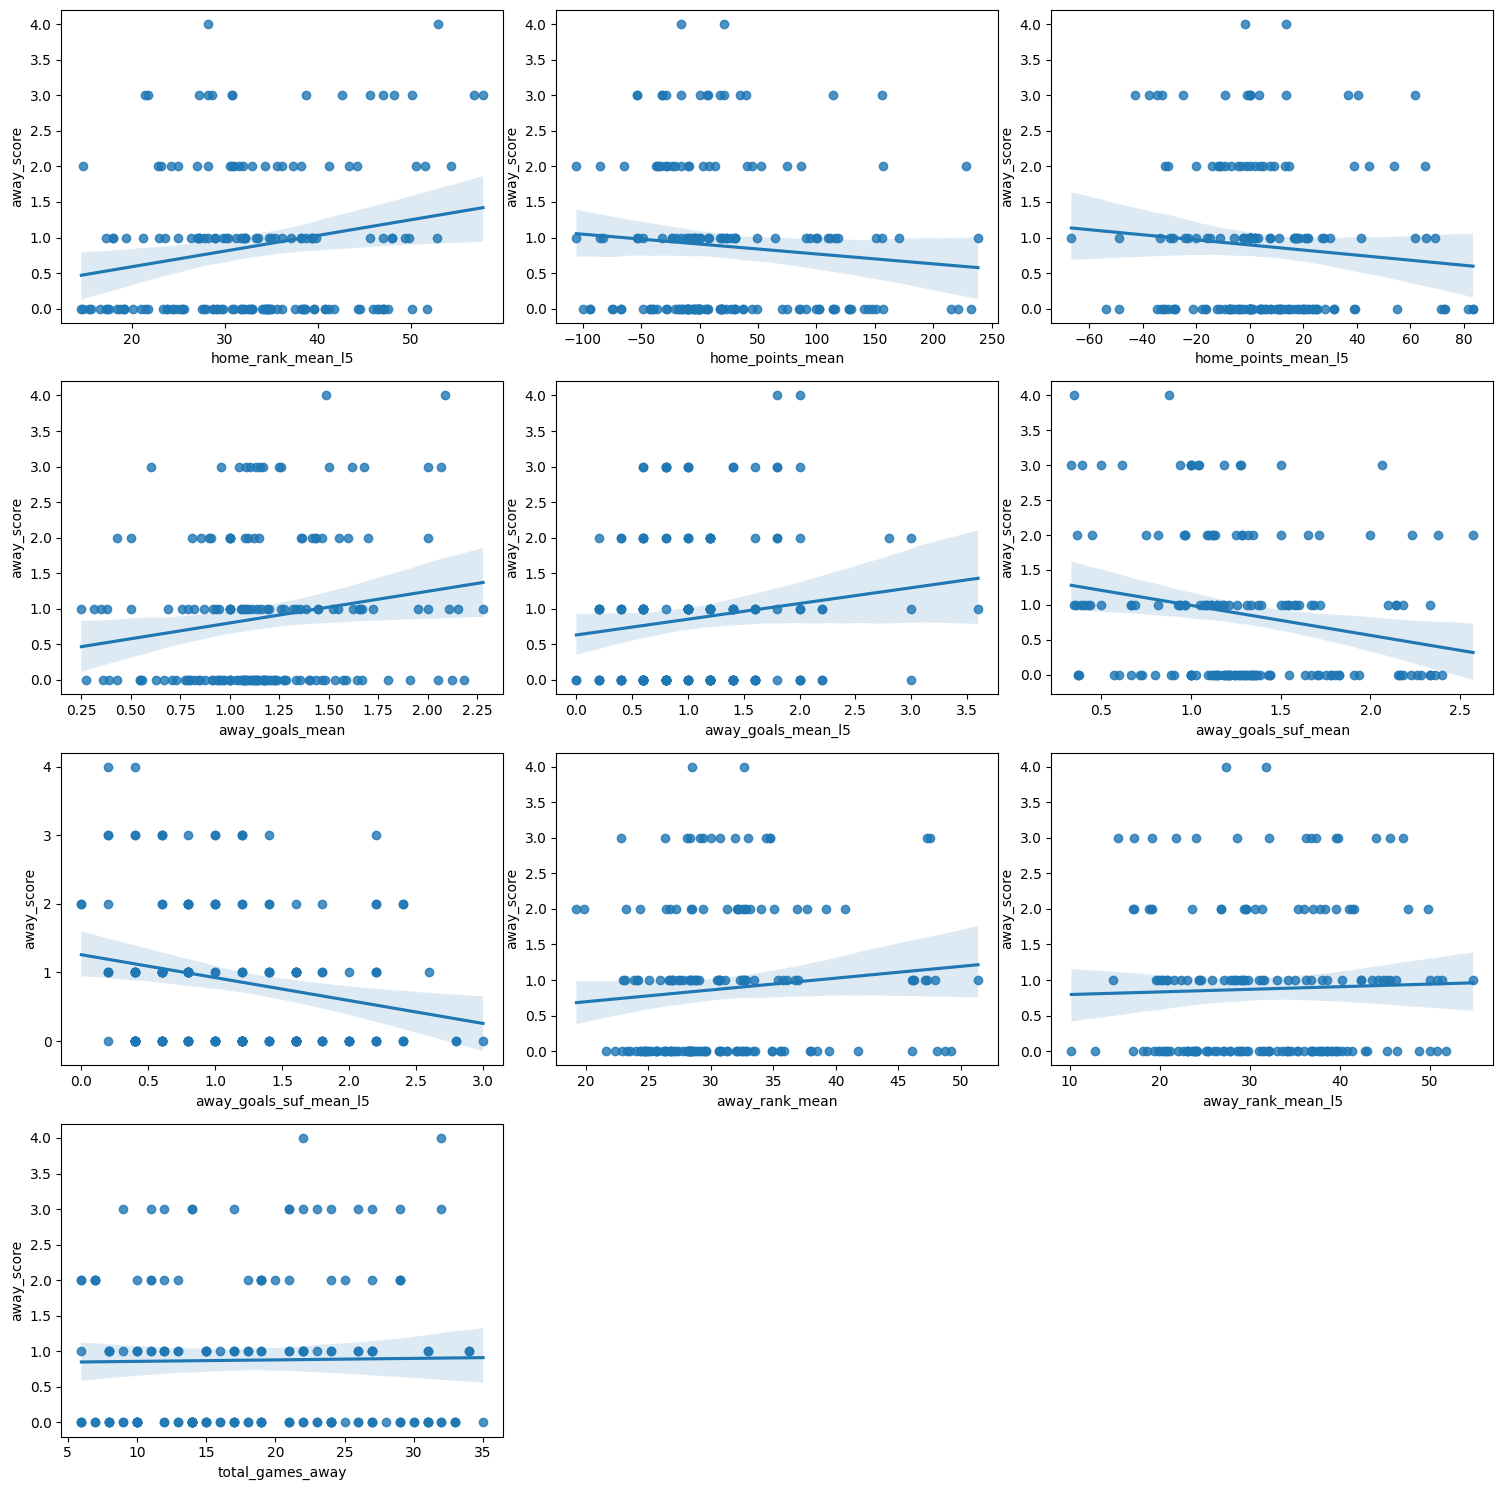

In [47]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[:10])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[10:20]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

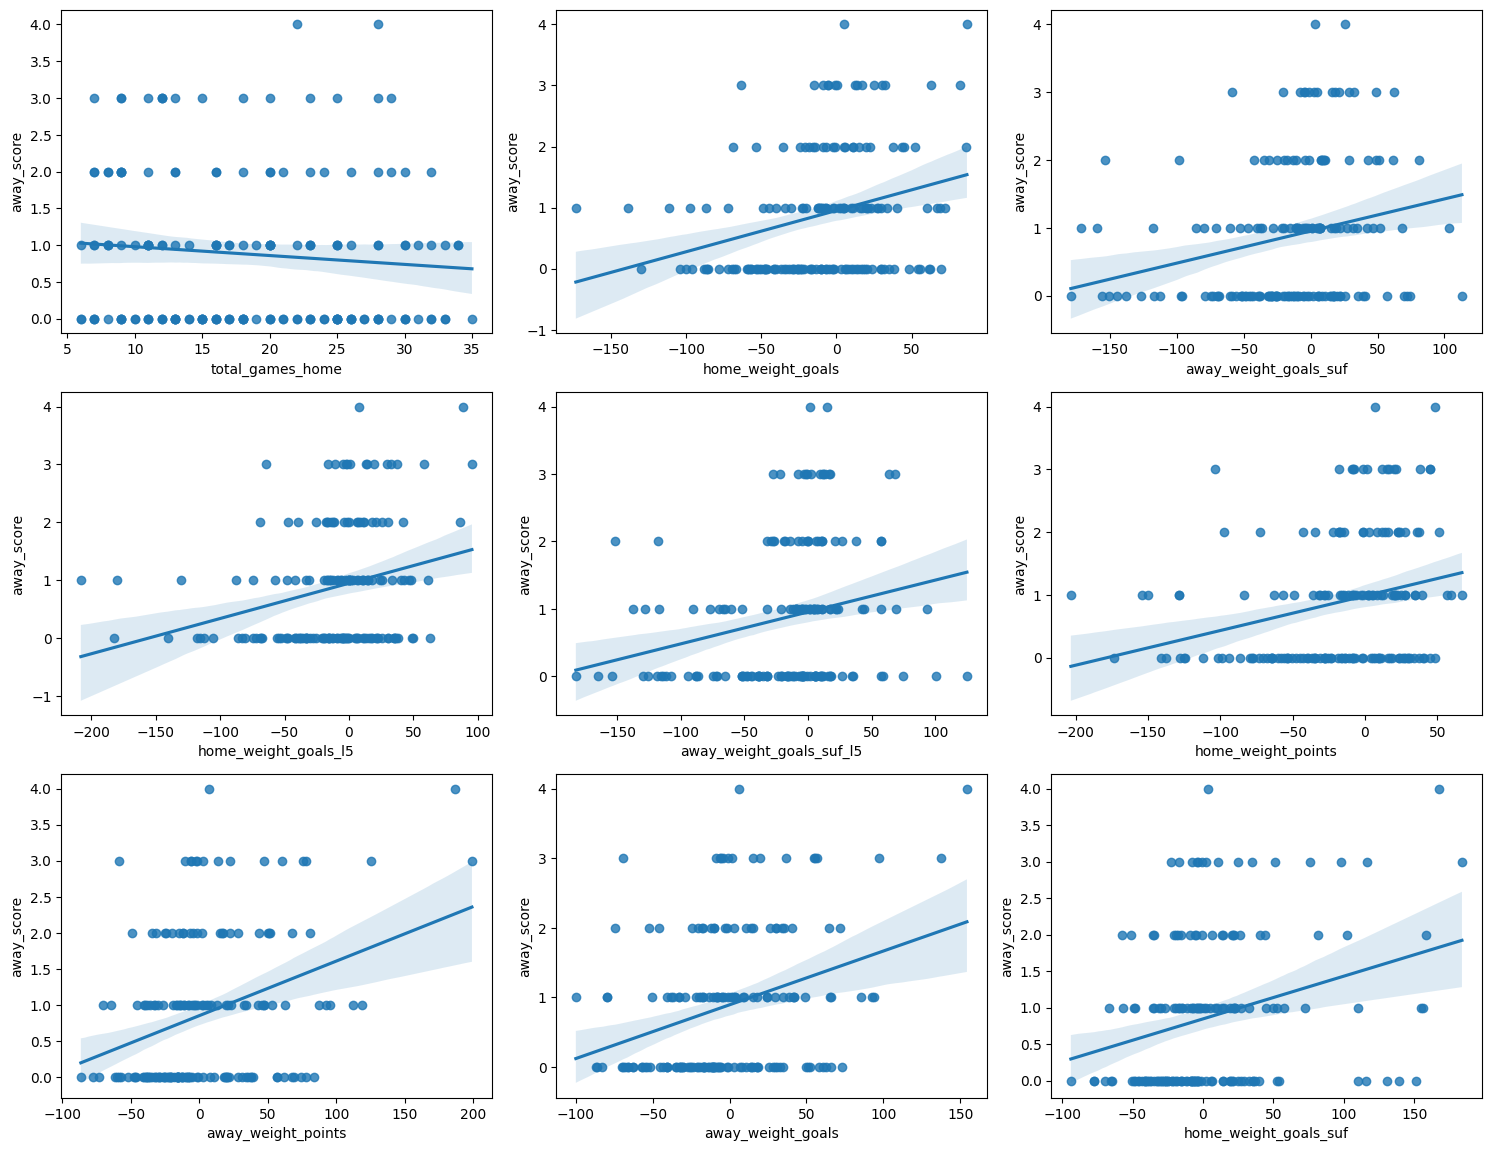

In [48]:
num_cols = 3

fig, axes = plt.subplots(nrows=int(len(possible_features[:10])/num_cols) + 1, ncols=num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, feature in enumerate(possible_features[20:]):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[row, col])

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

                     feature     slope  abs_slope
13           away_goals_mean  0.444776   0.444776
5            home_goals_mean -0.437537   0.437537
15       away_goals_suf_mean -0.429965   0.429965
7        home_goals_suf_mean  0.371044   0.371044
16    away_goals_suf_mean_l5 -0.334046   0.334046
8     home_goals_suf_mean_l5  0.270470   0.270470
14        away_goals_mean_l5  0.221254   0.221254
3           rank_change_home  0.080448   0.080448
6         home_goals_mean_l5 -0.061467   0.061467
4           rank_change_away -0.048586   0.048586
10         home_rank_mean_l5  0.022003   0.022003
9             home_rank_mean  0.020583   0.020583
17            away_rank_mean  0.016583   0.016583
20          total_games_home -0.012023   0.012023
1                  rank_away -0.011312   0.011312
2                   rank_dif  0.009064   0.009064
0                  rank_home  0.008524   0.008524
27         away_weight_goals  0.007727   0.007727
26        away_weight_points  0.007566   0.007566


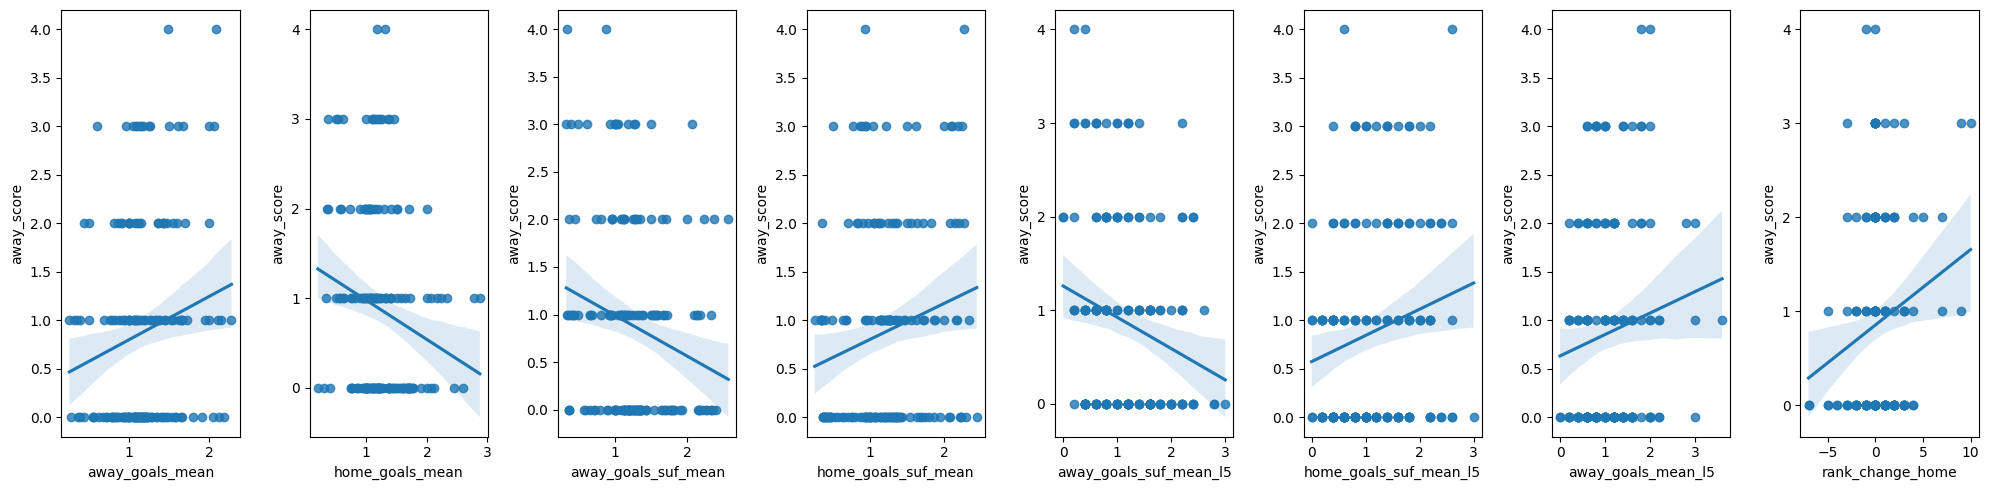

In [49]:
from sklearn.linear_model import LinearRegression


slopes = []

for feature in possible_features:
    X = df_feats[[feature]].values.reshape(-1, 1)
    y = df_feats[target].values
    reg = LinearRegression().fit(X, y)
    slopes.append(reg.coef_[0])

slopes_df = pd.DataFrame({'feature': possible_features, 'slope': slopes})

slopes_df['abs_slope'] = slopes_df['slope'].abs()
slopes_df = slopes_df.sort_values(by='abs_slope', ascending=False)

selected_features = slopes_df['feature'].values[:8]  # Aquí seleccionamos las top 3 características

print(slopes_df)
print("Selected features:", selected_features)

fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(20, 5))
for i, feature in enumerate(selected_features):
    sns.regplot(x=feature, y=target, data=df_feats, ax=axes[i])

plt.tight_layout()
plt.show()

In [50]:
selected_features = [['away_goals_mean'], ['home_goals_mean'], ['away_goals_suf_mean'], 
 ['home_goals_suf_mean'], ['away_goals_suf_mean_l5'], ['home_goals_suf_mean_l5'], ['away_goals_mean_l5'], ['rank_change_home']]

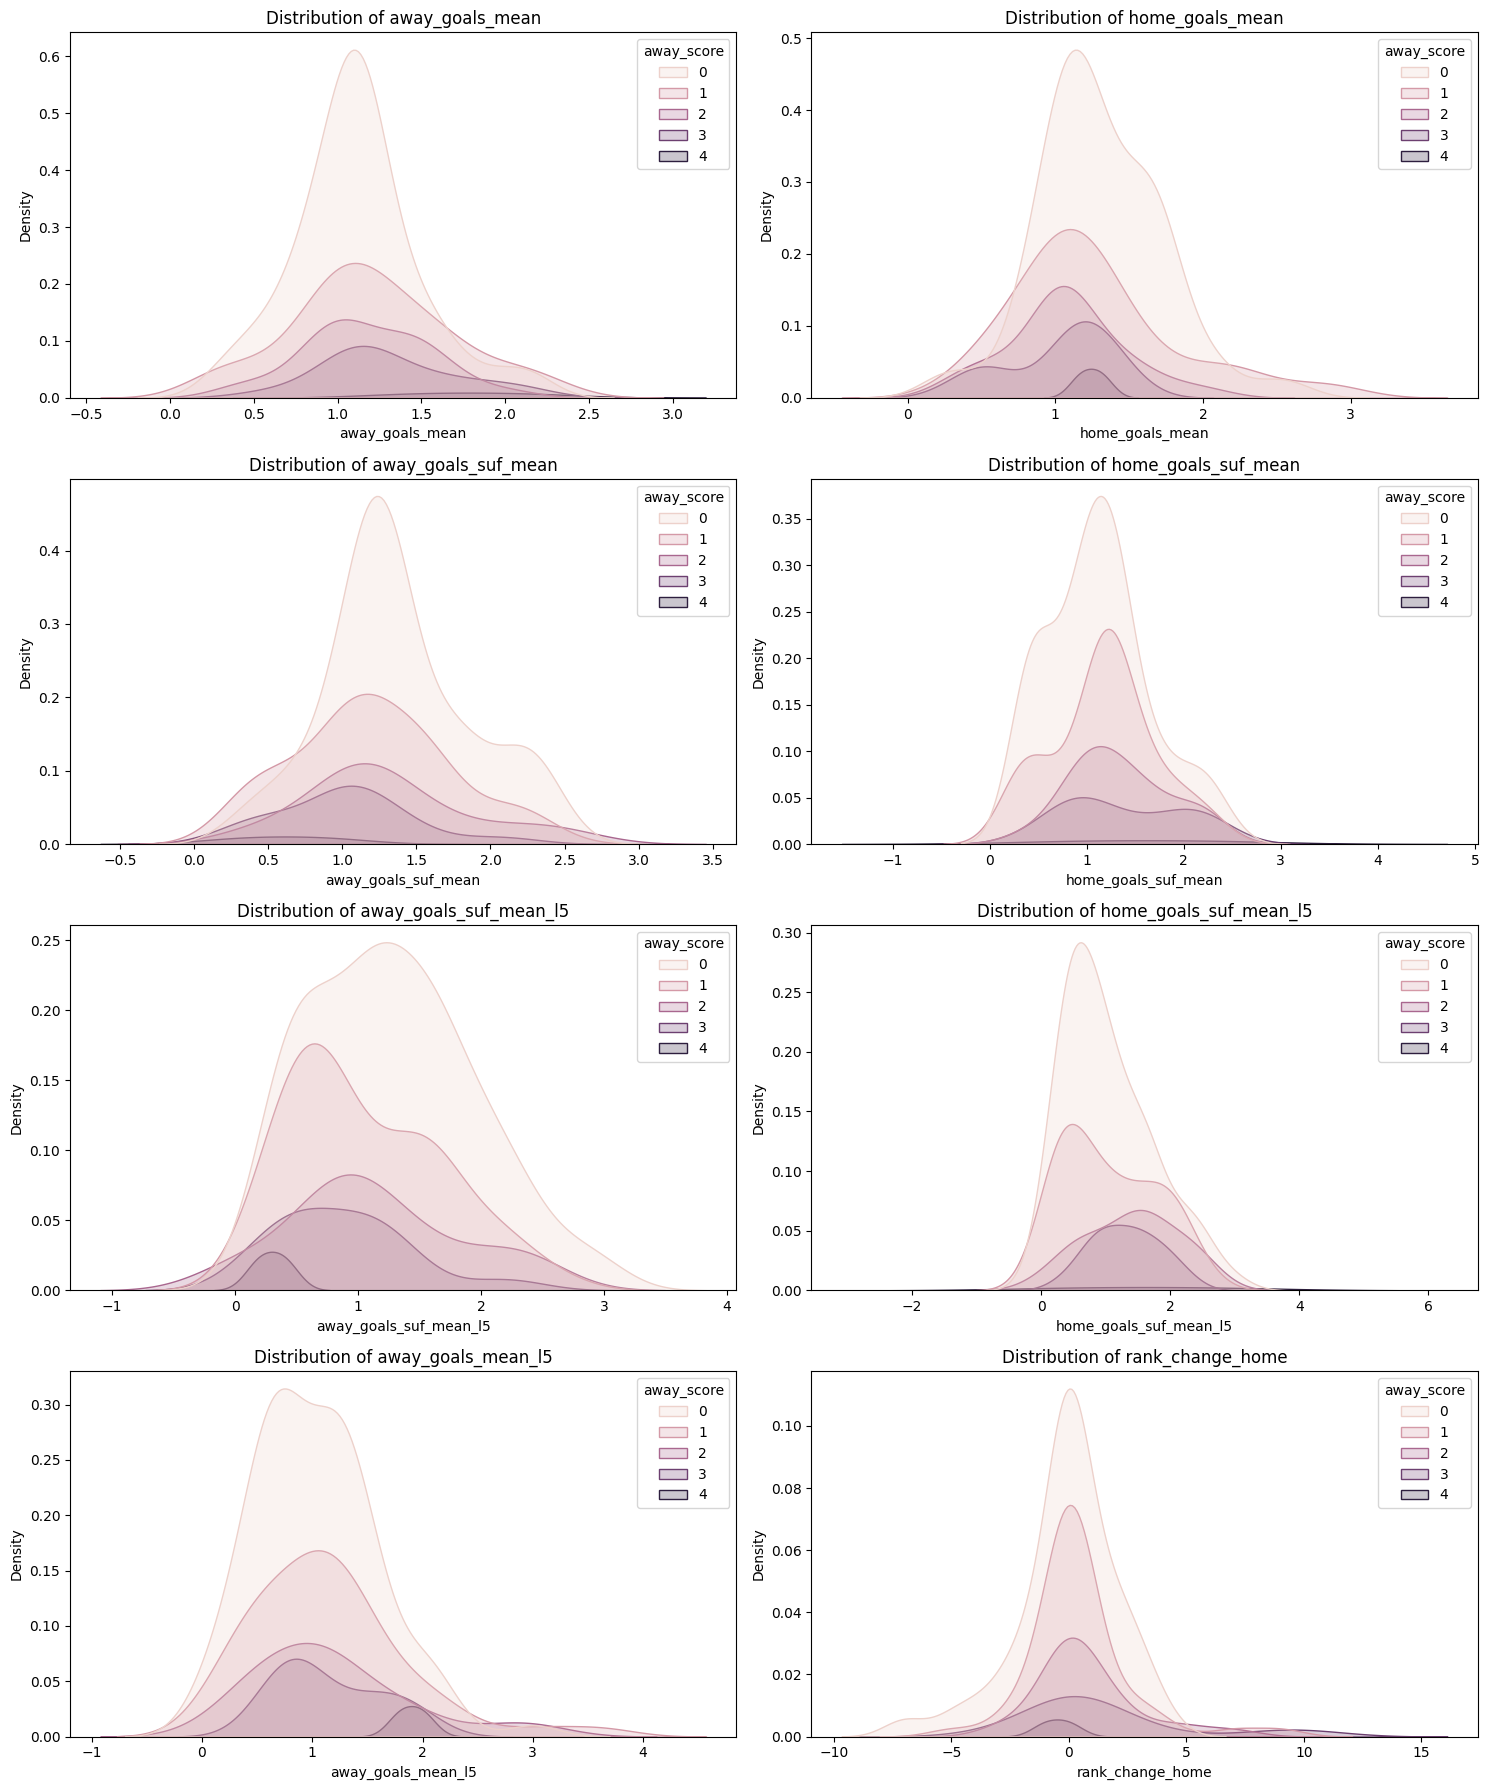

In [51]:
# Número de filas y columnas
num_cols = 2
num_rows = (len(selected_features) + num_cols - 1) // num_cols

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 18))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear gráficos de densidad para cada característica
for i, feature in enumerate(selected_features):
    sns.kdeplot(data=df_feats, x=feature[0], hue=target, fill=True, warn_singular=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature[0]}')

# Ocultar cualquier subplot vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [52]:

away_columns = ['away_goals_mean', 'home_goals_mean', 'away_goals_suf_mean', 'home_goals_suf_mean', 'away_goals_suf_mean_l5', 'home_goals_suf_mean_l5', 'away_goals_mean_l5', 'rank_change_home']
import os

folder_name = "created"
datasets_folder = "./datasets"

new_folder_path = os.path.join(datasets_folder, folder_name)
os.makedirs(new_folder_path, exist_ok=True)

df_model[["away_score"]+away_columns].to_csv('./datasets/created/away_db.csv',index=False)

